In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

# 1)
### a

Text(0.5, 1.0, 'Fishing Boat')

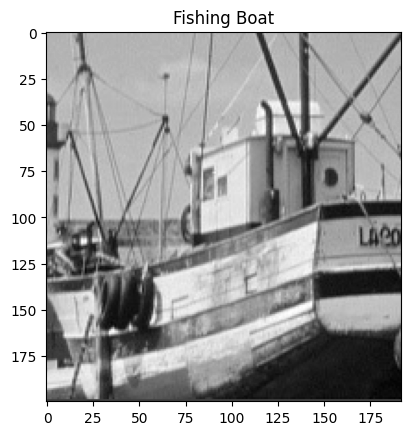

In [21]:
boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)
# nature = np.asarray(Image.open('nature.bmp'))

fig, ax = plt.subplots()
ax.imshow(boat, cmap='gray')
ax.set_title(f"Fishing Boat")



### b

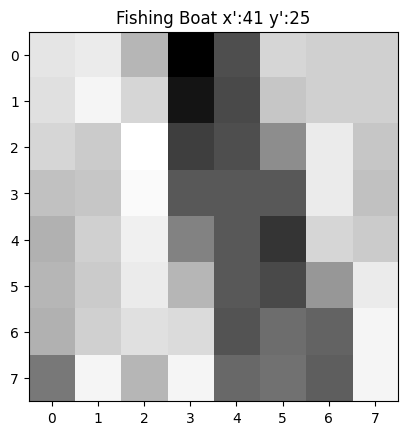

In [22]:
firstname = len('albert')-1
lastname = len('yuan')-1
x = 8*firstname + 1
y = 8*lastname + 1
K = 8
chip = boat[x:x+K,y:y+K]
fig, ax = plt.subplots()
ax.imshow(chip, cmap='gray')
ax.set_title(f"Fishing Boat x':{x} y':{y}")
plt.show()

In [23]:
### helper function for parts C, D, E
def removePixels(src, s):
    img = np.copy(src)
    totalPixels = img.shape[0] * img.shape[1] 
    idx_to_remove = np.random.choice(totalPixels,totalPixels-s, replace=False)

    for i in idx_to_remove:
        x = i // 8
        y = i-(x*8)

        img[x][y] = np.NaN
    return img


### c

Text(0.5, 1.0, "Fishing Boat x':41 y':25 s=50")

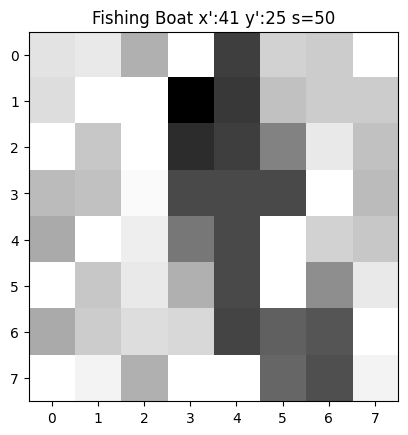

In [24]:
chip_s50 = removePixels(chip, 50)

fig, ax = plt.subplots()

ax.imshow(chip_s50, cmap='gray')
ax.set_title(f"Fishing Boat x':{x} y':{y} s=50")


### d

Text(0.5, 1.0, "Fishing Boat x':41 y':25 s=30")

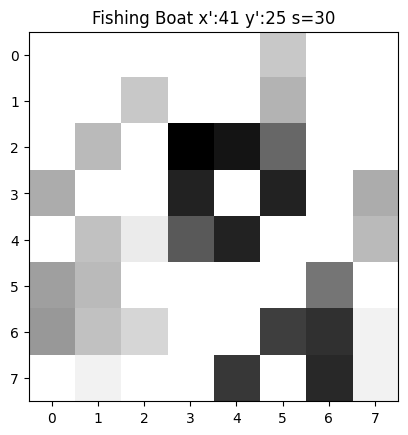

In [25]:
chip_s30 = removePixels(chip, 30)

fig, ax = plt.subplots()

ax.imshow(chip_s30, cmap='gray')
ax.set_title(f"Fishing Boat x':{x} y':{y} s=30")


### e

Text(0.5, 1.0, "Fishing Boat x':41 y':25 s=10")

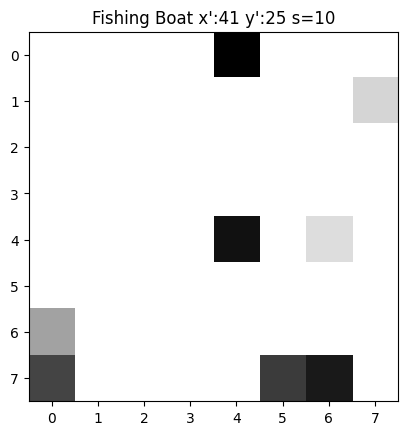

In [26]:
chip_s10 = removePixels(chip, 10)
fig, ax = plt.subplots()

ax.imshow(chip_s10, cmap='gray')
ax.set_title(f"Fishing Boat x':{x} y':{y} s=10")


# 2)

In [27]:
### helper function for A and B
def basis(u, v, x, y, P, Q):
    alpha = np.sqrt(1/P) if u == 0 else np.sqrt(2/P)
    beta = np.sqrt(1/Q) if v == 0 else np.sqrt(2/Q)
    return alpha*beta*math.cos(math.pi*(2*x-1)*(u-1)/(2*P))*math.cos(math.pi*(2*y-1)*(v-1)/(2*P))

def getBasisChip(imgShape, u,v):
    P, Q = imgShape
    img = np.zeros((P,Q))

    # change x and y to be 1-indexed
    # go down by columns
    for y in range(1,Q+1):
        for x in range(1,P+1):
            img[y-1][x-1] = basis(u, v, x, y, P, Q)
    return img



### a

Text(0.5, 1.0, 'basis vector chip u=3 v=4')

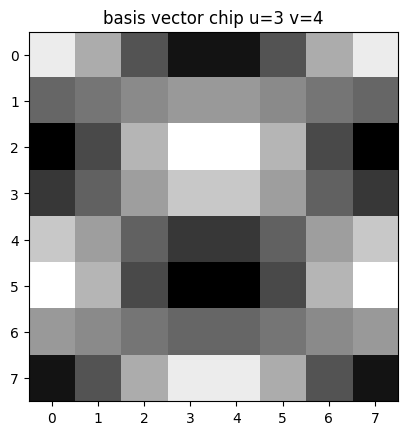

In [28]:
fig, ax = plt.subplots()
ax.imshow(getBasisChip(chip.shape, 3,4), cmap='gray')
ax.set_title("basis vector chip u=3 v=4")

### b

Text(0.5, 1.0, 'basis vector chip u=5 v=2')

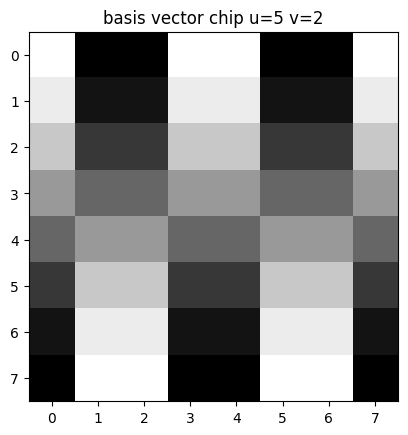

In [29]:
fig, ax = plt.subplots()
ax.imshow(getBasisChip(chip.shape, 5,2), cmap='gray')
ax.set_title("basis vector chip u=5 v=2")

### c

Text(0.5, 1.0, 'Basis Vector Matrix from of u/v x/y ranges of [8,8]')

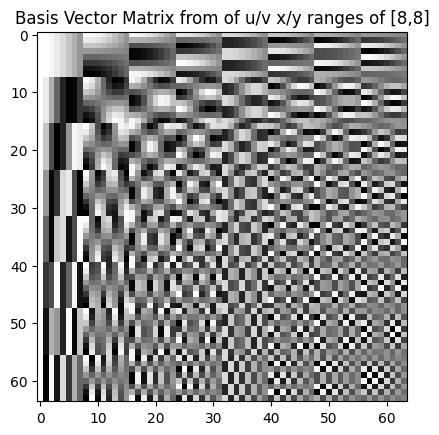

In [30]:
P, Q = chip.shape
basisVectorMatrix = np.zeros(((P*Q)*(P*Q)))
i = 0
for x in range(1,P+1):
    for y in range(1,Q+1):
        for v in range(1,Q+1):
            for u in range(1,P+1):
                basisVectorMatrix[i] = basis(u, v, x, y, P, Q)
                i += 1

basisVectorMatrix = basisVectorMatrix.reshape((P*Q),(P*Q))
fig, ax = plt.subplots()
ax.imshow(basisVectorMatrix, cmap='gray')
ax.set_title(f"Basis Vector Matrix from of u/v x/y ranges of [{P},{Q}]")


# 3)

In [35]:
from sklearn.linear_model import Lasso

# reshape to only include non-NAN 
sensed_idx= ~np.isnan(chip_s30)

chip_s30_noNan = chip_s30[sensed_idx]
basisVectorMatrix_s30 = np.zeros((chip_s30_noNan.shape[0],basisVectorMatrix.shape[1]))

i = 0
P2 = sensed_idx.shape[0]
Q2 = sensed_idx.shape[1]
for x in range(P2):
    for y in range(Q2):
        if sensed_idx[x][y]:
            basisVectorMatrix_s30[i] = basisVectorMatrix[x*P2 + y]
            i+=1

# fit lasso model
reg = 0.1

model = Lasso(reg).fit(basisVectorMatrix_s30, chip_s30_noNan)
weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
w0 = model.intercept_

pred_chip =  np.reshape(basisVectorMatrix@weights + w0, (P,Q))


### a

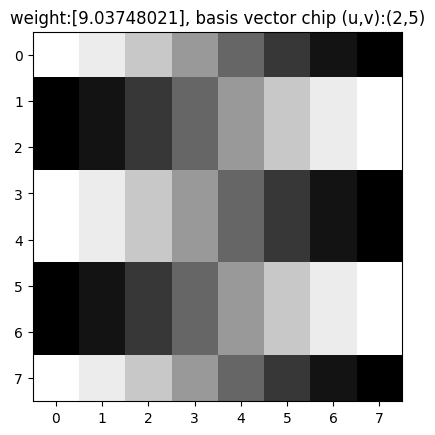

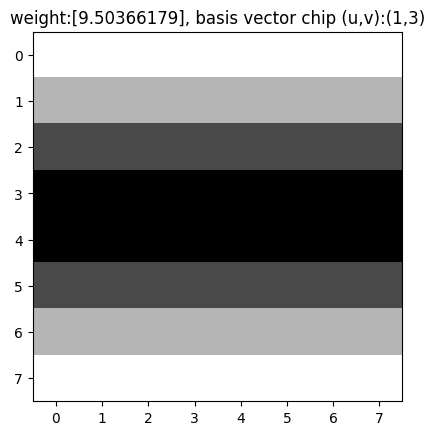

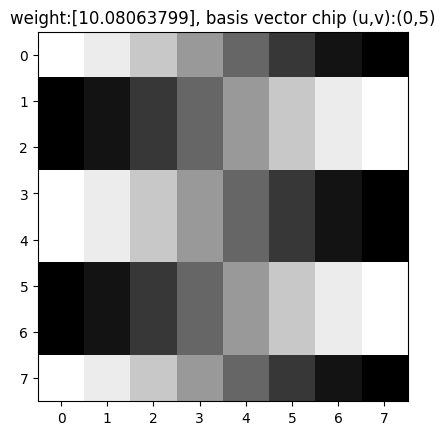

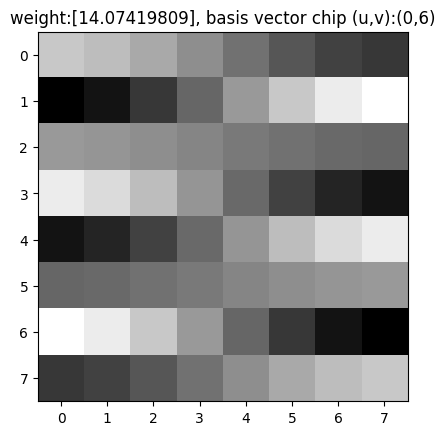

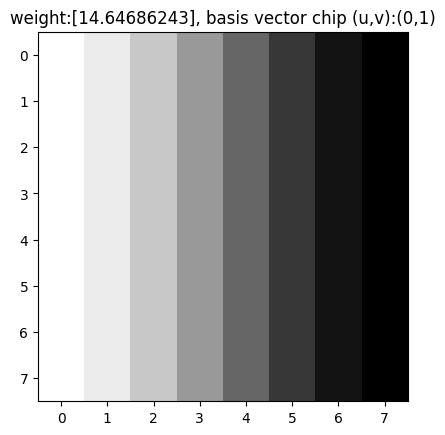

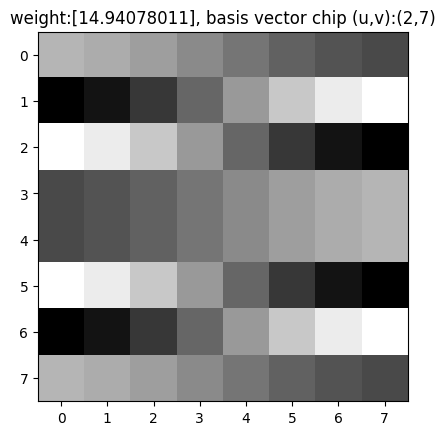

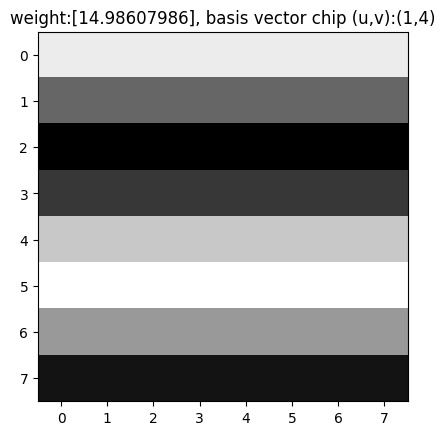

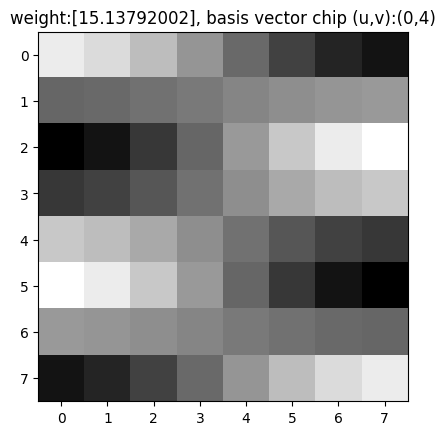

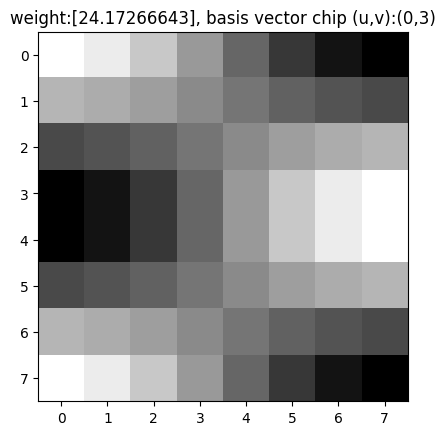

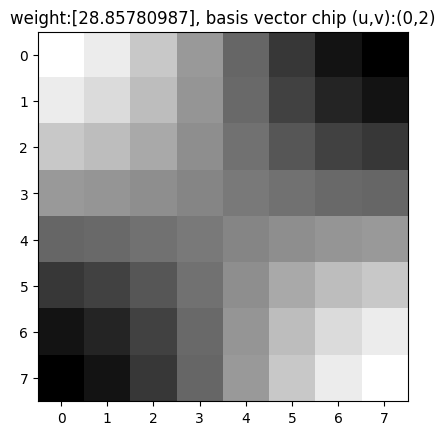

In [36]:
# basisVectorMatrix
abs_weights = np.abs(weights)

sorted_ind = np.unravel_index(np.argsort(abs_weights, axis=None), abs_weights.shape)[0]
top_10_mag = abs_weights[sorted_ind][-10:]

n = len(sorted_ind)
K = 8
for ind in range(n-10,n):
    i = sorted_ind[ind]
    v = i // K
    u = i - v*K

    fig, ax = plt.subplots()

    ax.imshow(getBasisChip(chip_s30.shape, u,v), cmap="gray")
    ax.set_title(f"weight:{abs_weights[i]}, basis vector chip (u,v):({u},{v})")
    plt.show()
    


### b

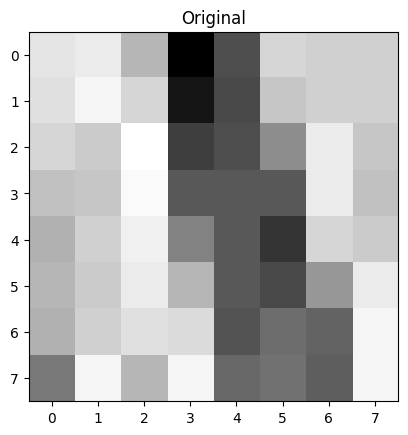

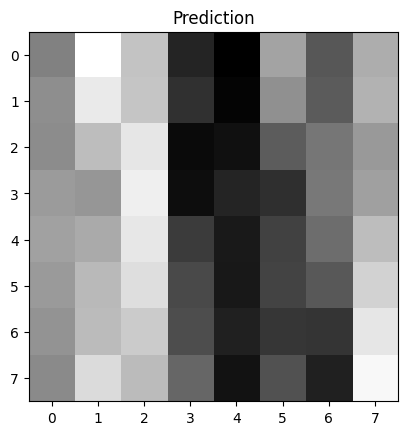

In [37]:
fig,ax = plt.subplots()
ax.imshow(chip, cmap="gray")
ax.set_title("Original")

fig,ax = plt.subplots()
ax.imshow(pred_chip, cmap="gray")
ax.set_title("Prediction")

plt.show()

### c

In [38]:
W,H = chip.shape
MSE = np.sum(np.power(chip - pred_chip,2))/(W+H)
print(f"MSE: {MSE}")

MSE: 212.5616283468213
